# Basic Forecasting Techniques

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
print("Data before transformation")
data = pd.read_csv('Customers_in_a_Shop.csv',header=None)
data.head()

Data before transformation


0      1
0  1949-01  114.0
1  1949-02  120.0
2  1949-03  134.0
3  1949-04   67.0
4  1949-05  123.0

### Reading the dataset

In [2]:
data = pd.read_csv('Customers_in_a_Shop.csv',header=None)
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date') # convert data into row index

#Shape of the dataset
data.shape

(144, 1)

In [3]:
data.describe()

Customers
count  140.000000
mean   291.878571
std    150.040592
min     34.000000
25%    180.000000
50%    265.500000
75%    364.750000
max    770.000000

In [4]:
data.head()

Customers
Date                 
1949-01-01      114.0
1949-02-01      120.0
1949-03-01      134.0
1949-04-01       67.0
1949-05-01      123.0

In [5]:
data.describe()

Customers
count  140.000000
mean   291.878571
std    150.040592
min     34.000000
25%    180.000000
50%    265.500000
75%    364.750000
max    770.000000

## Missing Values

In [6]:
rows_with_nan = [index for index, row in data.iterrows() if row.isnull().any()]
print(rows_with_nan)

[Timestamp('1951-06-01 00:00:00'), Timestamp('1951-07-01 00:00:00'), Timestamp('1954-06-01 00:00:00'), Timestamp('1960-03-01 00:00:00')]


In [7]:
data.isnull().sum()

Customers    4
dtype: int64

View the missing data visually

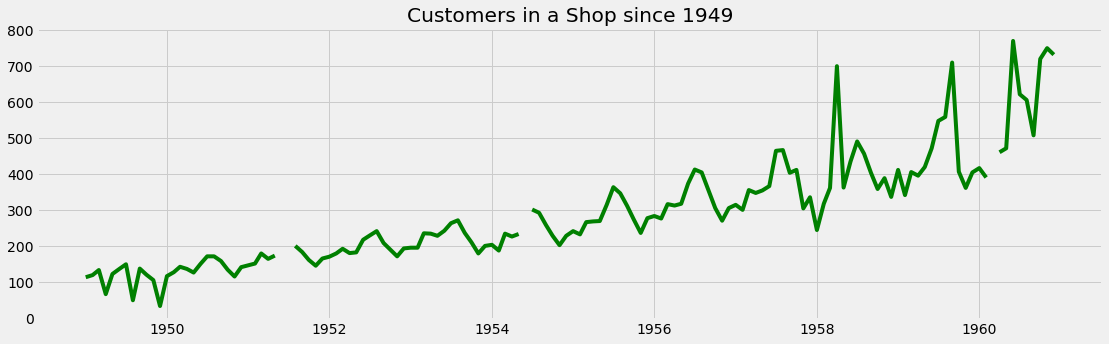

In [8]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='green')
plt.title("Customers in a Shop since 1949")
plt.show()

In [9]:
data.isnull().sum()

Customers    4
dtype: int64

# Option 1:Using fillna method using backfill or forwardfill (Run in seperate notebook)

In [10]:
data.Customers=data.Customers.fillna(method="ffill")
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
# ffill: propagate last valid observation forward to next valid backfill / bfill: use next valid observation to fill gap.

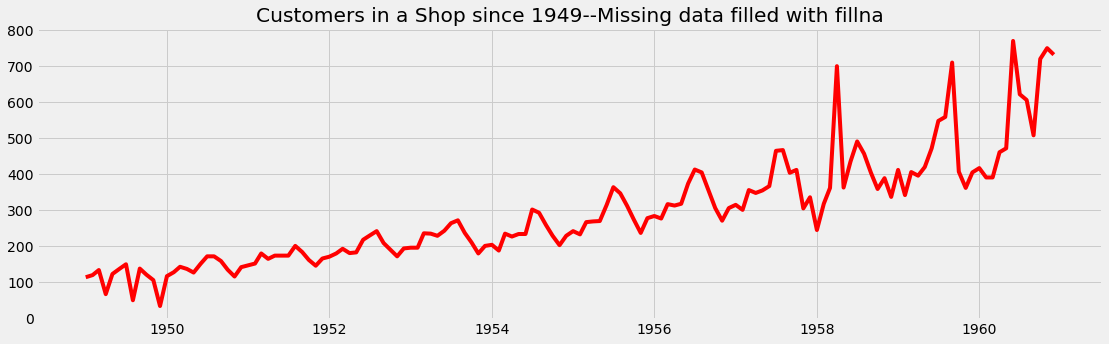

In [11]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='red')
plt.title("Customers in a Shop since 1949--Missing data filled with fillna")
plt.show()

## Option 2: Linear Interpolation

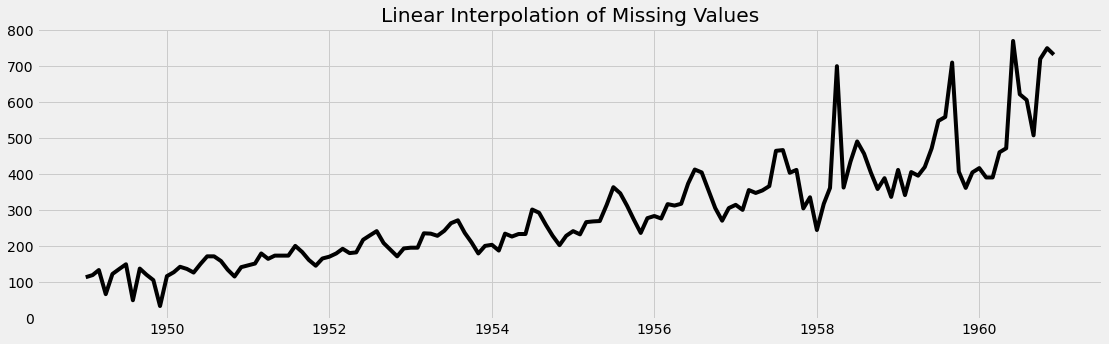

In [12]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

In [13]:
data['Customers'] = data['Customers_linear']

# Option 3 - Padding (Run in seperate notebook)

In [14]:
data.interpolate(method="pad", limit=4) # Limit value is equal to number of missing values, we had 4 values missing 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html
# See rough cells at end for a simple example

Customers  Customers_linear
Date                                   
1949-01-01      114.0             114.0
1949-02-01      120.0             120.0
1949-03-01      134.0             134.0
1949-04-01       67.0              67.0
1949-05-01      123.0             123.0
...               ...               ...
1960-08-01      606.0             606.0
1960-09-01      508.0             508.0
1960-10-01      720.0             720.0
1960-11-01      750.0             750.0
1960-12-01      732.0             732.0

[144 rows x 2 columns]

## Outliers Treatment

## Box plot
It is a standardized way of displaying the distribution of data. Any data points which are less than Q1-1.5IQR or greater than Q3+1.5IQR are considered to be outliers.

<AxesSubplot:xlabel='Customers_linear'>

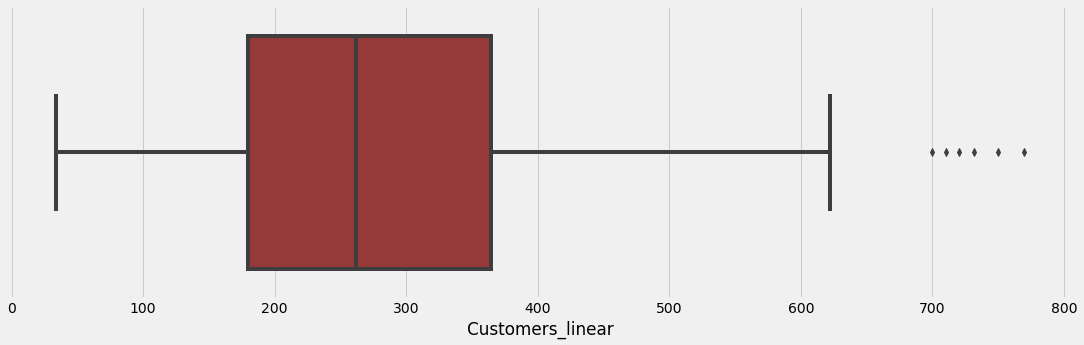

In [15]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(data['Customers_linear'], color='brown')

In [16]:
data['Customers_linear'].sort_values(ascending = False).head(7)

Date
1960-06-01    770.0
1960-11-01    750.0
1960-12-01    732.0
1960-10-01    720.0
1959-09-01    710.0
1958-04-01    700.0
1960-07-01    622.0
Name: Customers_linear, dtype: float64

In [17]:
# outliers treatment

data['Customers_linear'].loc[(data['Customers_linear']>=700)] = 622
# lets also check the null values again
data.isnull().sum()

Customers           0
Customers_linear    0
dtype: int64

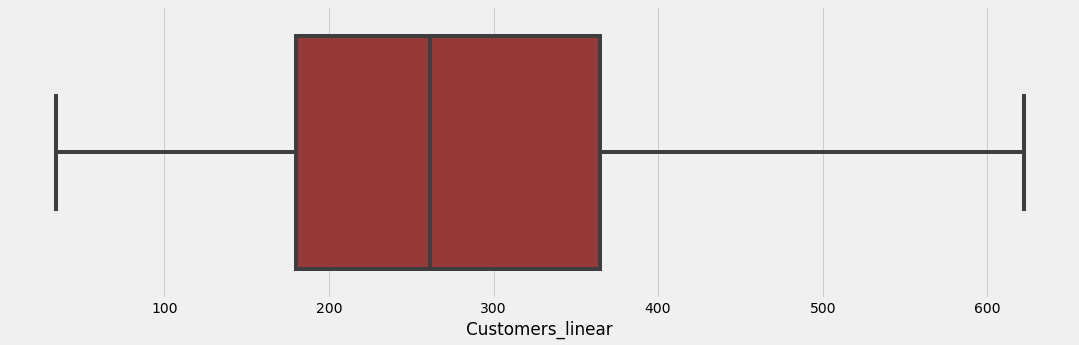

In [18]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(data['Customers_linear'], color='brown')
plt.show()

## Time Series Decomposition

In [19]:
import statsmodels.api as sm

### Additive Seasonal Decomposition

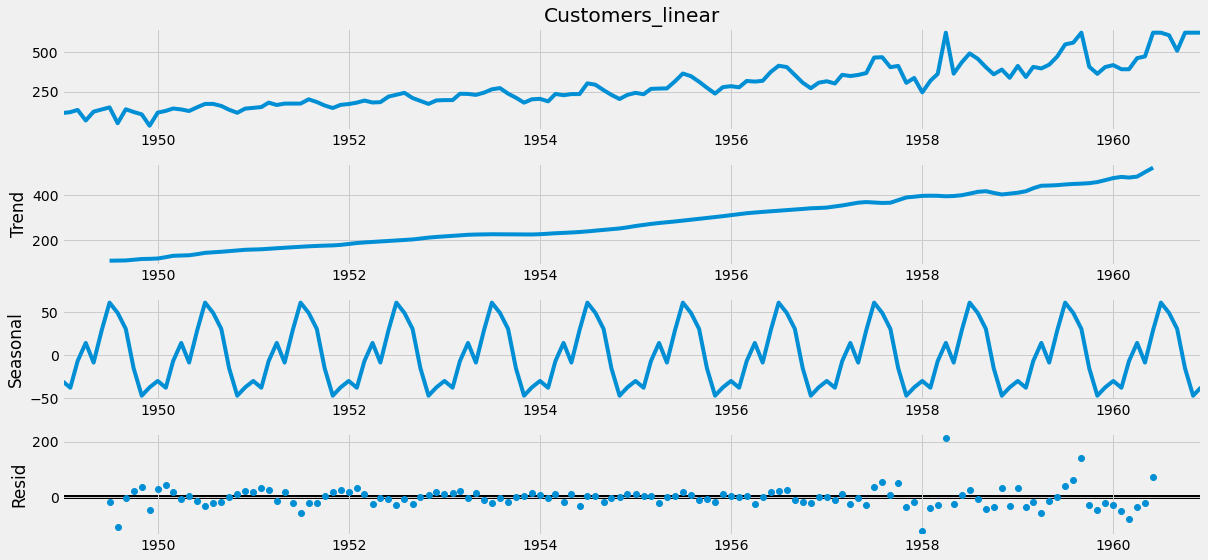

In [20]:
plt.rcParams['figure.figsize'] = (17,8)

#https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html 

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='additive')
decomposition.plot()
                                          
plt.show()

### Multiplicative Seasonal Decomposition

In [21]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='multiplicative')
fig = decomposition.plot()
plt.show()

## Splitting Train and Test data

In [22]:
length_train = 115
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]

In [23]:
# lets check the shape of train

print(train.shape)
train.tail()

(115, 2)


Customers  Customers_linear
Date                                   
1958-03-01      362.0             362.0
1958-04-01      700.0             622.0
1958-05-01      363.0             363.0
1958-06-01      435.0             435.0
1958-07-01      491.0             491.0

In [24]:
# lets check the shape of test

print(train.shape)
test.head()

(115, 2)


Customers  Customers_linear
Date                                   
1958-08-01      457.0             457.0
1958-09-01      404.0             404.0
1958-10-01      359.0             359.0
1958-11-01      389.0             389.0
1958-12-01      337.0             337.0

# Naive Method
The naive method is the simplest method of all forecasting methods. It looks at the last historical data and extrapolates it for all the future values without adjusting or attempting to establish causal factors.

In [25]:
y_naive = test.copy() # we are creating a pandas data frame copy so that we keep different df for 
#each forecast model (long notebook)
y_naive['forecasted_naive'] = train['Customers'][length_train-1] 
# Take the last indexed value and extrapolate it

In [26]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_naive['forecasted_naive'], label = 'naive forecast')

plt.legend()
plt.title('Naive Method')
plt.show()

# Simple Average Method
In this method, we take the future predictions equal to the average of all the historical data.

In [27]:
y_avg = test.copy()

y_avg['forecasted_avg'] = train['Customers'].mean() 
# forecast along mean of the training dataframe = Simple average

In [28]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_avg['forecasted_avg'], label = 'simple average forecast')

plt.legend()
plt.title('Simple Average Method')
plt.show()

In [29]:
mfe = np.round(np.mean(test['Customers']-y_avg['forecasted_avg']),2)
mfe

250.42

In [30]:
mae = np.round(np.mean(np.abs(test['Customers']-y_avg['forecasted_avg'])),2)
mae

250.42

In [31]:
mape = np.round(np.mean(np.abs(test['Customers']-y_avg['forecasted_avg'])/test['Customers'])*100,2)
mape

47.88

In [32]:
from sklearn.metrics import mean_squared_error
rmse = np.round(np.sqrt(mean_squared_error(test['Customers'], y_avg['forecasted_avg'])),2)
rmse

283.38

# Simple Moving Average Method
In this method, we take the future predictions equal to the average of a moving window. A window can be a time period of 3 months, 6 months, 9 months or 1 year.

In [33]:
y_moving = data.copy()

window = 9 # 9 months moving window for moving average
y_moving["moving_average_forecast"] = data['Customers'].rolling(window).mean()
y_moving['moving_average_forecast'][length_train:] = y_moving['moving_average_forecast'][length_train-1]

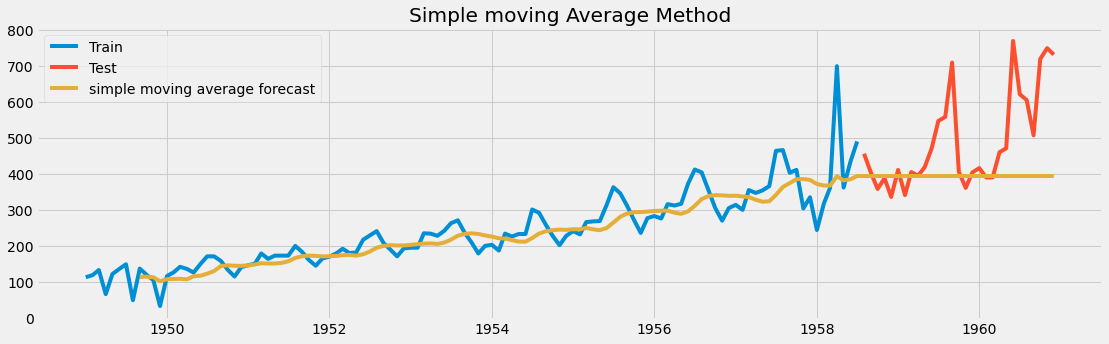

In [34]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_moving['moving_average_forecast'], label = 'simple moving average forecast')

plt.legend()
plt.title('Simple moving Average Method')
plt.show()

In [35]:
# Below cells are a reepeat with comments and link

In [36]:
y_moving = data.copy()

window = 9 # we have taken a rolling period of 9 months -- you can change this to 3 months, 6 months and observe
# Size of the moving window. This is the number of observations used for calculating the statistic. 
#Each window will be a fixed size.
y_moving["moving_average_forecast"] = data['Customers'].rolling(window).mean() # This method creates SMA
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
y_moving['moving_average_forecast'][length_train:] = y_moving['moving_average_forecast'][length_train-1]

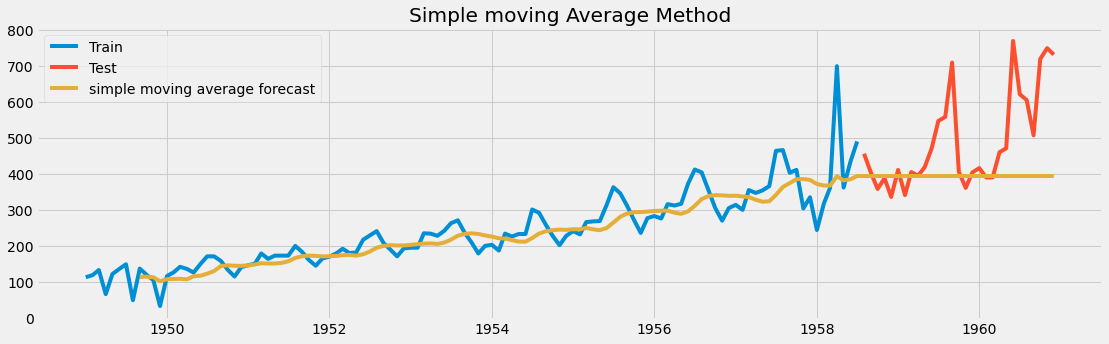

In [37]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_moving['moving_average_forecast'], label = 'simple moving average forecast')

plt.legend()
plt.title('Simple moving Average Method')
plt.show()

# Simple Exponential Smoothing


In [38]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html

model = SimpleExpSmoothing(train['Customers'])
model_fit = model.fit(smoothing_level=0.2)
# Put the traijing df under the API with only alpha as hyper-parameter
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.fit.html#statsmodels.tsa.holtwinters.SimpleExpSmoothing.fit
model_fit.params
y_exp = test.copy()
y_exp['Exponential_forecast'] = model_fit.forecast(24) # 24 = 2 years or 24 months i.e 1958 to 1960

C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [39]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_exp['Exponential_forecast'], label = 'simple exponential forecast')

plt.legend()
plt.title('Simple Exponential Method')
plt.show()

# Holt Exponential Smoothing
Holt’s exponential smoothing captures the level and trend of time series in the forecast.

The forecast equation is a function of both level and trend.

y(t+1) = l(t) +b(t) 

Where l(t) is the level component and b(t) is the trend component.

The trend component is calculated as shown

b(t) = β(l(t) - l(t-1)) + (1-β)b(t-1) 

Here beta is the smoothing parameter for trend.


In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html
model = ExponentialSmoothing(train['Customers'], seasonal_periods=12, trend='multiplicative')
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.04) # set two hyperparameters 
model_fit.params
y_holtexponential = test.copy()
y_holtexponential['holtexponential_forecast'] = model_fit.forecast(24)

C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


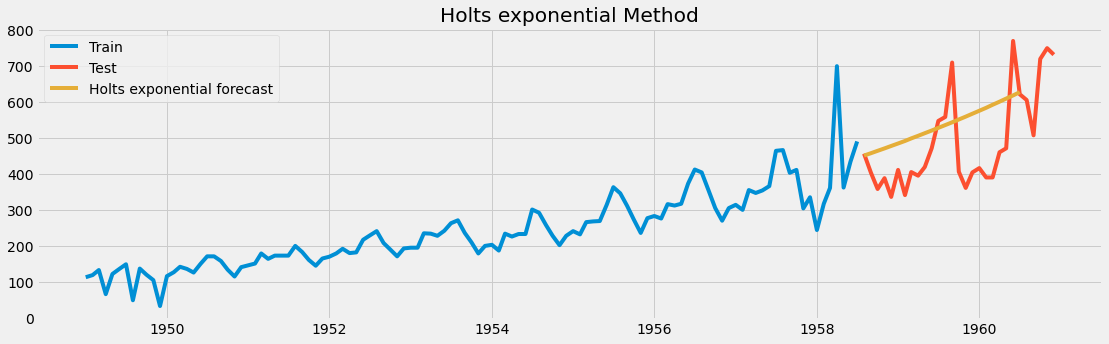

In [41]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_holtexponential['holtexponential_forecast'], label = 'Holts exponential forecast')

plt.legend()
plt.title('Holts exponential Method')
plt.show()

# Holt Winter Exponential Smoothing
This techniques forecasts based on level, trend and seasonality.
The forecast equation for this method includes seasonality.
	
y(t+1) = l(t)+b(t)+s(t+1-m) 
Here m is the number of time a season repeats in a time period.

In [42]:
model = ExponentialSmoothing(train['Customers'], seasonal_periods=12, trend='multiplicative', seasonal='additive')
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.04)
model_fit.params
y_holtwinter = test.copy()
y_holtwinter['holtwinter_forecast'] = model_fit.forecast(36)

C:\Users\Varun Salunkhe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


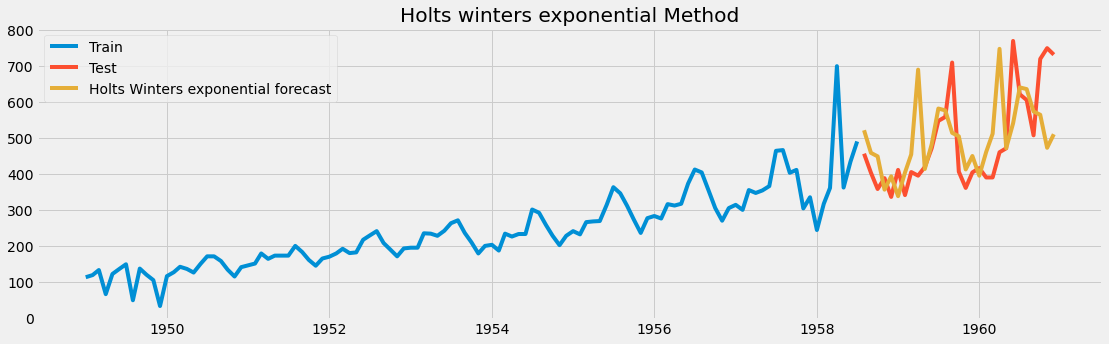

In [43]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_holtwinter['holtwinter_forecast'], label = 'Holts Winters exponential forecast')

plt.legend()
plt.title('Holts winters exponential Method')
plt.show()

In [44]:
mfe = np.round(np.mean(test['Customers']-y_holtwinter['holtwinter_forecast']),2)
mfe

-11.04

In [45]:
mae = np.round(np.mean(np.abs(test['Customers']-y_holtwinter['holtwinter_forecast'])),2)
mae

94.34

In [46]:
mape = np.round(np.mean(np.abs(test['Customers']-y_holtwinter['holtwinter_forecast'])/test['Customers'])*100,2)
mape

18.86

In [47]:
rmse = np.round(np.sqrt(mean_squared_error(test['Customers'], y_holtwinter['holtwinter_forecast'])),2)
rmse

128.94

## Rough work

In [48]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [49]:
s = pd.Series([np.nan, "single_one", np.nan,
               "fill_two_more", np.nan, np.nan, np.nan,
               3.71, np.nan])

In [50]:
s

0              NaN
1       single_one
2              NaN
3    fill_two_more
4              NaN
5              NaN
6              NaN
7             3.71
8              NaN
dtype: object

In [51]:
s.interpolate(method='pad', limit=5)
# The first NaN does not get replaced as there is no previous value

0              NaN
1       single_one
2       single_one
3    fill_two_more
4    fill_two_more
5    fill_two_more
6    fill_two_more
7             3.71
8             3.71
dtype: object

In [52]:
# Rough work - FillNA
import pandas as pd
# Creating the Series
sr = pd.Series([100, None, None, 18, 65, None, 32, 10, 5, 24, None])
# Create the Index
index_ = pd.date_range('2010-10-09', periods = 11, freq ='M')
# set the index
sr.index = index_
  
# Print the series
print(sr)

2010-10-31    100.0
2010-11-30      NaN
2010-12-31      NaN
2011-01-31     18.0
2011-02-28     65.0
2011-03-31      NaN
2011-04-30     32.0
2011-05-31     10.0
2011-06-30      5.0
2011-07-31     24.0
2011-08-31      NaN
Freq: M, dtype: float64


In [53]:
# fill the values using forward fill method
result = sr.fillna(method = 'ffill')

In [54]:
# Print the result
print(result)

2010-10-31    100.0
2010-11-30    100.0
2010-12-31    100.0
2011-01-31     18.0
2011-02-28     65.0
2011-03-31     65.0
2011-04-30     32.0
2011-05-31     10.0
2011-06-30      5.0
2011-07-31     24.0
2011-08-31     24.0
Freq: M, dtype: float64


In [55]:
# fill the values using backward fill method
result = sr.fillna(method = 'bfill')

In [56]:
# Print the result
print(result)

2010-10-31    100.0
2010-11-30     18.0
2010-12-31     18.0
2011-01-31     18.0
2011-02-28     65.0
2011-03-31     32.0
2011-04-30     32.0
2011-05-31     10.0
2011-06-30      5.0
2011-07-31     24.0
2011-08-31      NaN
Freq: M, dtype: float64


In [57]:
# fill the values using pad fill method - pad is same as ffill. Its good to give limit value equal to number of missing values
result = sr.fillna(method = 'pad',limit=4)

In [58]:
# Print the result
print(result)
# 100, None, None, 18, 65, None, 32, 10, 5, 24, None

2010-10-31    100.0
2010-11-30    100.0
2010-12-31    100.0
2011-01-31     18.0
2011-02-28     65.0
2011-03-31     65.0
2011-04-30     32.0
2011-05-31     10.0
2011-06-30      5.0
2011-07-31     24.0
2011-08-31     24.0
Freq: M, dtype: float64
